In [16]:
import random
import math

In [17]:
def getExpRV(lam):
    return -1.0 / lam * math.log(random.random())

In [86]:
PH = 0.25
PL = 0.75
R11L = 0.2
R12L = 0.8
R2D = 0.5
R21 = 0.5
mu1 = 25
mu2 = 40
lams = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
# lams = [3.0]
H = 'H'
L = 'L'
Q1 = 'Q1'
Q2 = 'Q2'
ARR = 'ARR'
DEP = 'DEP'

In [87]:
class Event(object):
    def __init__(self, priority, time, queue, type, transfer=True):
        self.priority = priority
        self.priority = priority
        self.time = time
        self.queue = queue
        self.type = type
        self.transfer = transfer

In [88]:
def insert(eventList, event):
    i = 0
    while(i<len(eventList)):
        if eventList[i].time>event.time:
            break
        i+=1
    eventList.insert(i, event)

def get(eventList):
    return eventList.pop(0)

In [89]:
# Throughput= # of cust enters / end time
# E[N] = area / end time
# E[tau] = area / # of cust enters

In [90]:
throughputH1s = []
throughputH2s = []
throughputL1s = []
throughputL2s = []

ENH1s = []
ENH2s = []
ENL1s = []
ENL2s = []
    
ETH1s = []
ETL1s = []
for lam in lams:
    lamL = lam * PL # Low priority arrival parameter
    lamH = lam * PH # High priority arrival parameter

    clock = 0.0

    NH1 = 0 # number of high priority custs in queue 1
    NH2 = 0 # number of high priority custs in queue 2
    NL1 = 0 # number of high priority custs in queue 1
    NL2 = 0 # number of high priority custs in queue 2

    NARRL1 = 0 # nuber of high priority custs arrive in queue 1
    NARRL2 = 0
    NARRH1 = 0
    NARRH2 = 0

    AREAH1 = 0.0
    AREAH2 = 0.0
    AREAL1 = 0.0
    AREAL2 = 0.0

    NDEP = 0 # count output customers

    eventList = [] # events sort by time 

    done = False

    insert(eventList, Event(H, (0.0+getExpRV(lamH)), Q2, ARR, False))
    insert(eventList, Event(L, 0.0+getExpRV(lamL), Q1, ARR, False))

    while not done:
        event = get(eventList)
        prev = clock
        clock = event.time
        # update area
        AREAH1 += NH1*(clock-prev)
        AREAH2 += NH2*(clock-prev)
        AREAL1 += NL1*(clock-prev)
        AREAL2 += NL2*(clock-prev)

        if event.type == ARR:
            if event.priority == H:
                if event.queue == Q1:
                    NH1 += 1
                    NARRH1 += 1
                    if NH1 + NL1 == 1:
                        insert(eventList, Event(H, clock+getExpRV(mu1), Q1, DEP))
                else: #event.queue = Q2
                    NH2 += 1
                    NARRH2 += 1
                    if not event.transfer:
                        insert(eventList, Event(H, clock+getExpRV(lamH), Q2, ARR, False))
                    if NH2 + NL2 == 1:
                        insert(eventList, Event(H, clock+getExpRV(mu2), Q2, DEP))
            else: # evetn.priority = L
                if event.queue == Q1:
                    NL1 += 1
                    NARRL1 += 1
                    if not event.transfer:
                        insert(eventList, Event(L, clock+getExpRV(lamL), Q1, ARR, False))
                    if NH1 + NL1 == 1:
                        insert(eventList, Event(L, clock+getExpRV(mu1), Q1, DEP))
                else: # event.queue = Q2
                    NL2 += 1
                    NARRL2 += 1
                    if NH2 + NL2 == 1:
                        insert(eventList, Event(L, clock+getExpRV(mu2), Q2, DEP))
        else: # event type is depature
            if event.queue == Q1:
                if event.priority == H: # always go to Queue 2
                    NH1 -= 1
                    insert(eventList, Event(H, clock, Q2, ARR))
                else: # event.priority = L 
                    NL1 -= 1 
                    if random.random()<R11L:
                        insert(eventList, Event(L, clock, Q1, ARR))
                    else:
                        insert(eventList, Event(L, clock, Q2, ARR))
                if NH1 > 0:
                    insert(eventList, Event(H, clock+getExpRV(mu1), Q1, DEP))
                elif NL1 > 0:
                    insert(eventList, Event(L, clock+getExpRV(mu1), Q1, DEP))
            else: # event.queue = Q2
                if event.priority == H:
                    NH2 -= 1
                    if random.random()<R21:
                        insert(eventList, Event(H, clock, Q1, ARR))
                    else:
                        NDEP += 1
                else: # event.priority = L
                    NL2 -= 1
                    if random.random()<R21:
                        insert(eventList, Event(L, clock, Q1, ARR))
                    else:
                        NDEP += 1
                if NH2 > 0:
                    insert(eventList, Event(H, clock+getExpRV(mu2), Q2, DEP))
                elif NL2 > 0:
                    insert(eventList, Event(L, clock+getExpRV(mu2), Q2, DEP))

        if(NDEP>500000):
            done = True
    throughputH1 = (NARRH1)/clock
    throughputH2 = (NARRH2)/clock
    throughputL1 = (NARRL1)/clock
    throughputL2 = (NARRL2)/clock

    ENH1 = AREAH1 / clock
    ENH2 = AREAH2 / clock
    ENL1 = AREAL1 / clock
    ENL2 = AREAL2 / clock

    ETH1 = AREAH1 / NARRH1
    ETL1 = AREAL1 / NARRL1
    print('**********', lam, 'start *************')
    print('Throughput for High priority and Queue 1', throughputH1)
    print('Throughput for High priority and Queue 2', throughputH2)
    print('Throughput for Low priority and Queue 1', throughputL1)
    print('Throughput for Low priority and Queue 2', throughputL2)
    
    print('Expected number for High priority in Queue 1', ENH1)
    print('Expected number for High priority in Queue 2', ENH2)
    print('Expected number for Low priority in Queue 1', ENL1)
    print('Expected number for Low priority in Queue 2', ENL2)
    
    print('Expected waiting time for High priority in Queue 1', ETH1)
    print('Expected waiting time for Low priority in Queue 1', ETL1)
    print('**********', lam, 'end *************')
    throughputH1s.append(throughputH1)
    throughputH2s.append(throughputH2)
    throughputL1s.append(throughputL1)
    throughputL2s.append(throughputL2)

    ENH1s.append(ENH1)
    ENH2s.append(ENH2)
    ENL1s.append(ENL1)
    ENL2s.append(ENL2)
    
    ETH1s.append(ETH1)
    ETL1s.append(ETL1)

********** 1.0 start *************
Throughput for High priority and Queue 1 0.2507383121645218
Throughput for High priority and Queue 2 0.5021781303982489
Throughput for Low priority and Queue 1 1.8806896682660836
Throughput for Low priority and Queue 2 1.5037925046156813
Expected number for High priority in Queue 1 0.010852229012814098
Expected number for High priority in Queue 2 0.013168262645365417
Expected number for Low priority in Queue 1 0.08209088708622342
Expected number for Low priority in Queue 2 0.039620976330163295
Expected waiting time for High priority in Queue 1 0.043281096211947916
Expected waiting time for Low priority in Queue 1 0.043649352932271776
********** 1.0 end *************
********** 2.0 start *************
Throughput for High priority and Queue 1 0.498653156153453
Throughput for High priority and Queue 2 0.9992509719861782
Throughput for Low priority and Queue 1 3.7527370262557223
Throughput for Low priority and Queue 2 3.0029546805327194
Expected number fo

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(lams, exper, y_label):
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    plt.xlabel('lambda')
    plt.ylabel(y_label)
    plt.plot(lams, exper, 'g+-')
    for a, b in zip(lams, exper):
        plt.text(a, b, '%.2f' %b, ha='center', va='bottom', fontsize=10)
    plt.xticks(lams)
    plt.show()

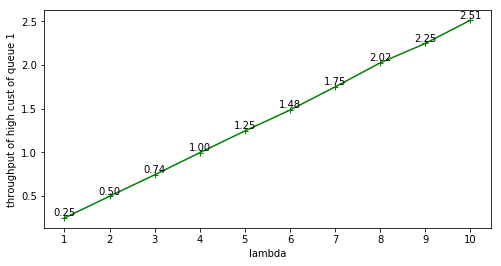

In [110]:
plot(lams, throughputH1s, 'throughput of high cust of queue 1')

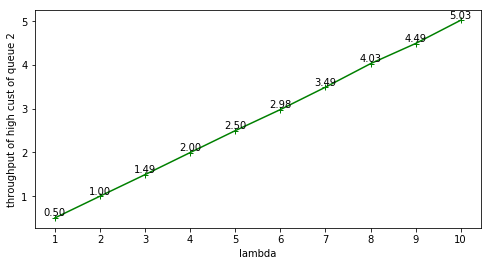

In [109]:
plot(lams, throughputH2s, 'throughput of high cust of queue 2')

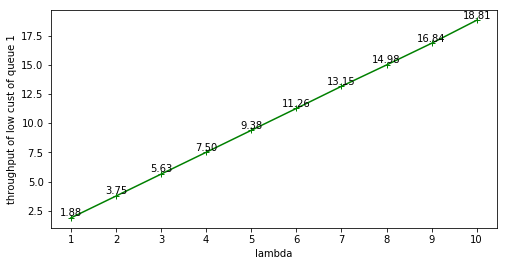

In [108]:
plot(lams, throughputL1s, 'throughput of low cust of queue 1')

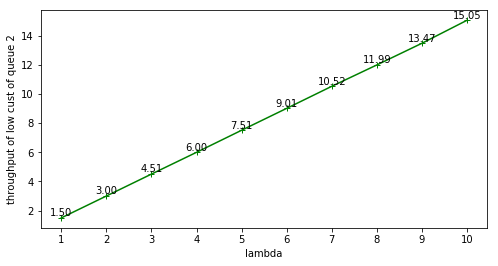

In [107]:
plot(lams, throughputL2s, 'throughput of low cust of queue 2')

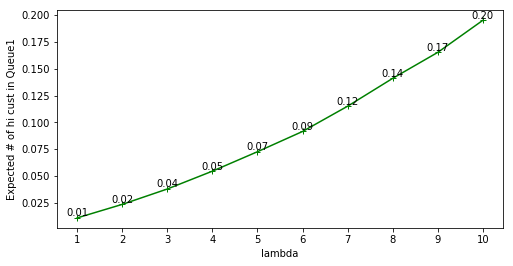

In [105]:
plot(lams, ENH1s, 'Expected # of hi cust in Queue1')

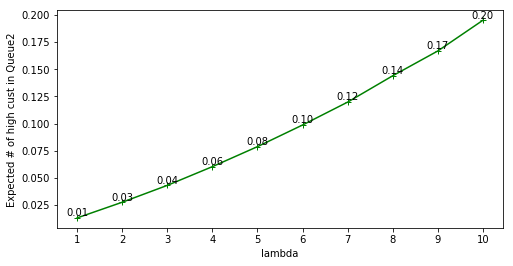

In [106]:
plot(lams, ENH2s, 'Expected # of high cust in Queue2')

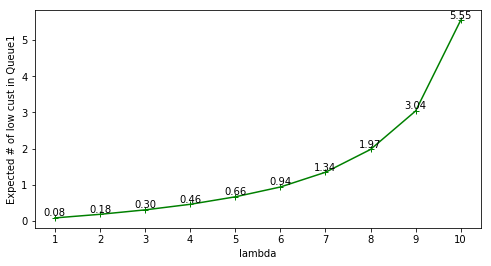

In [104]:
plot(lams, ENL1s, 'Expected # of low cust in Queue1')

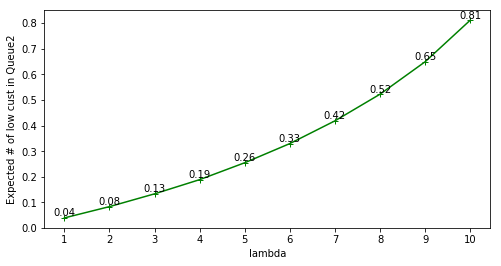

In [103]:
plot(lams, ENL2s, 'Expected # of low cust in Queue2')

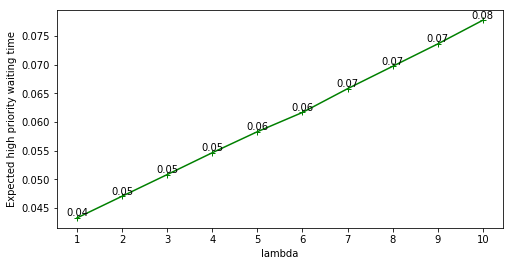

In [101]:
plot(lams, ETH1s, 'Expected high priority waiting time')

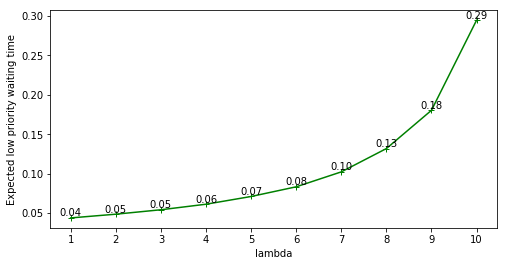

In [102]:
plot(lams, ETL1s, 'Expected low priority waiting time')